In [1]:
#%run /Users/shabnanasser/workplace/git/Capstone_Two/Cap2_Preprocessing.ipynb

# Modeling
In the Data Modeling section, we are going to train our standardised data with three different ML models: Logistic Regression, Decision Tree Classifier and Random Forest classifier. Also, we will check the accuracy, precision, recall and f-scores of each model and find the best performing model among them.


## 1) Logistic Regression

In [2]:
#importing required libraries

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score


In [3]:
# Create a logistic regression model with specified solver and maximum iterations
logreg_model = LogisticRegression(solver='liblinear',max_iter=1000)

# Hyperparameter tuning with cross-validation
# Cross-validate the logistic regression model using 5-fold cross-validation

cv_scores_logreg = cross_val_score(logreg_model, X_train, y_train, cv=5)
print(f"Cross-Validation Scores for Logistic Regression: {cv_scores_logreg}")
print(f"Mean CV Score: {cv_scores_logreg.mean()}\n")

# Train and evaluate the logistic regression model
# Fit the model on the transformed training data
logreg_model.fit(X_train_transformed, y_train)
# Make predictions on the transformed test data
y_pred_logreg = logreg_model.predict(X_test_transformed)

# Calculate evaluation metrics for logistic regression
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

# Print the evaluation metrics for logistic regression
print("Evaluation Metrics for Logistic Regression:")
print(f"Accuracy: {accuracy_logreg}")
print(f"Precision: {precision_logreg}")
print(f"Recall: {recall_logreg}")
print(f"F1-Score: {f1_logreg}\n")

Cross-Validation Scores for Logistic Regression: [0.85796767 0.86489607 0.84064665 0.86589595 0.82774566]
Mean CV Score: 0.8514304022213619

Evaluation Metrics for Logistic Regression:
Accuracy: 0.9260628465804066
Precision: 0.676056338028169
Recall: 0.45714285714285713
F1-Score: 0.5454545454545455



InscClaimAmtReimbursed: 1.5686735560465341
ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_4: 1.317573564911187
ChronicCond_Heartfailure: 1.311746868839952
ClmCount_Provider_BeneID_ClmDiagnosisCode_2: 1.1902312130785908
ChronicCond_Alzheimer: 1.1438191231373351
ClmCount_Provider_BeneID_ClmProcedureCode_1: 1.0688427032056582
ClmCount_Provider_DiagnosisGroupCode: 1.0255934101772197
Claim_DiagCode9_Insc_ReImb_Amt: 0.9345385419762388
ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_5: 0.8817402371187135
Diag_GCode_6_OPAnnualDeductibleAmt: 0.8734208195679264
Diag_GCode_OP_Annual_Ded_Amt: 0.8734208195679264
ChronicCond_stroke: 0.868396847646674
Claim_Duration: 0.8177884211029389
ClmCount_Provider_BeneID_ClmDiagnosisCode_9: 0.8133430276663602
ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_1: 0.8052460739548163
ClmCount_Provider_BeneID_ClmDiagnosisCode_4_ClmProcedureCode_2: 0.7725230958491663
ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_3: 0.7

Text(0.5, 1.0, 'Top 20 Feature Importances')

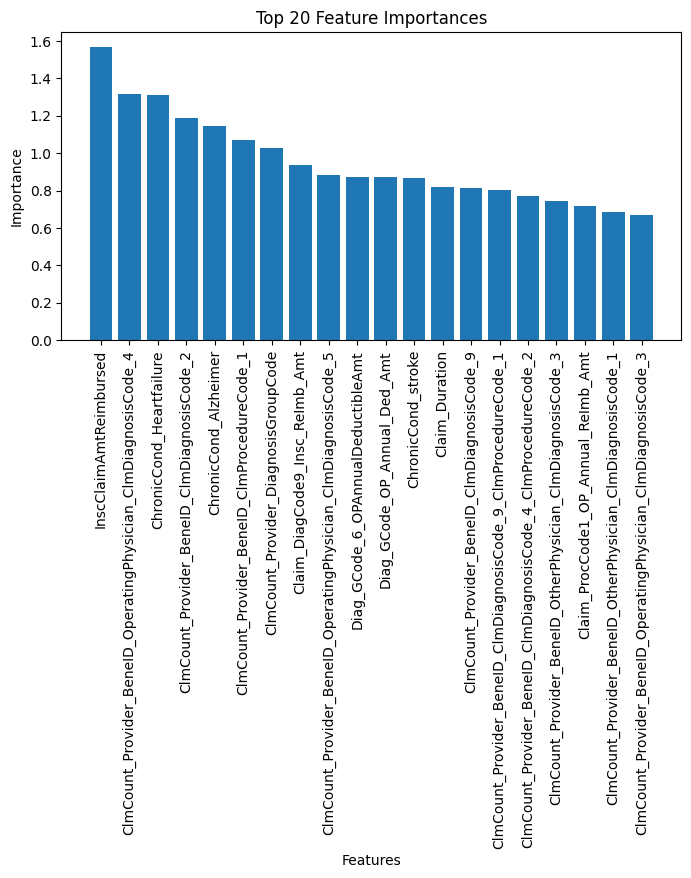

In [4]:
# Get feature importances (coefficients)
feature_importances = np.abs(logreg_model.coef_[0])

# Get the names of the features
feature_names = X.columns  # Assuming you have column names if X is a DataFrame

# Combine feature names and their importances
feature_importance_list = list(zip(feature_names, feature_importances))

# Sort the list by feature importance (descending order)
feature_importance_list.sort(key=lambda x: x[1], reverse=True)


top_n = 20  # Set the desired number of top features to plot

# Print or visualize the feature importances
for feature, importance in feature_importance_list[:top_n]:
    print(f"{feature}: {importance}")


plt.figure(figsize=(8,4))
plt.bar(range(top_n), [importance for feature, importance in feature_importance_list[:top_n]], align="center")
plt.xticks(range(top_n), [feature for feature, _ in feature_importance_list[:top_n]], rotation='vertical')
# Add x-axis and y-axis titles
plt.xlabel('Features')
plt.ylabel('Importance')

plt.title(f'Top {top_n} Feature Importances')



## 2) Decision Tree Classifier

In [5]:

# Create a Decision Tree model
dt_model = DecisionTreeClassifier()

# Hyperparameter tuning with cross-validation
# Cross-validate the Decision Tree model using 5-fold cross-validation
cv_scores_dt = cross_val_score(dt_model, X_train, y_train, cv=5)
print(f"Cross-Validation Scores for Decision Tree: {cv_scores_dt}")
print(f"Mean CV Score: {cv_scores_dt.mean()}\n")

# Train and evaluate the Decision Tree model
# Fit the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = dt_model.predict(X_test)

# Calculate evaluation metrics for the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Print the evaluation metrics for the Decision Tree model
print("Evaluation Metrics for Decision Tree:")
print(f"Accuracy: {accuracy_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1-Score: {f1_dt}\n")



Cross-Validation Scores for Decision Tree: [0.8960739  0.91108545 0.90993072 0.90635838 0.89017341]
Mean CV Score: 0.9027243722383158

Evaluation Metrics for Decision Tree:
Accuracy: 0.88909426987061
Precision: 0.42990654205607476
Recall: 0.4380952380952381
F1-Score: 0.43396226415094336



InscClaimAmtReimbursed: 0.4529786035608348
ChronicCond_ObstrPulmonary: 0.015478978930266347
OPT_PHY_OP_Annual_ReImb_Amt: 0.014488062284537502
Claim_ProcCode1_IP_Annual_ReImb_Amt: 0.013200046278453056
OPT_PHY_Claim_Duration: 0.012842972254576882
Claim_DiagCode9_OP_Annual_Ded_Amt: 0.012768653174381476
IPAnnualDeductibleAmt: 0.011638804593300574
Claim_DiagCode7_Claim_Duration: 0.010605302805188203
Claim_DiagCode2_OP_Annual_Ded_Amt: 0.00997646073386133
Claim_DiagCode7_Insc_ReImb_Amt: 0.0098326118132427
OPT_PHY_4_IPAnnualDeductibleAmt: 0.009569554848242134
Claim_DiagCode5_IP_Annual_ReImb_Amt: 0.009452321568951661
Claim_Admit_Diag_Code_2_DeductibleAmtPaid: 0.009285636807243385
Claim_ProcCode1_IP_Annual_Ded_Amt: 0.00879492127841842
Claim_DiagCode5_OP_Annual_Ded_Amt: 0.008329296268555381


Text(0.5, 1.0, 'Top 15 Feature Importances')

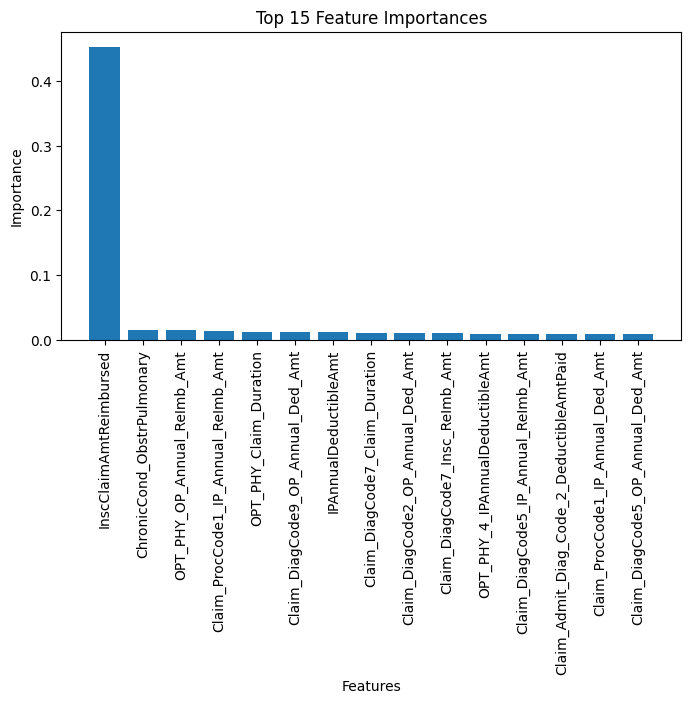

In [6]:
# Get feature importances
feature_importances = dt_model.feature_importances_

# Get the names of the features
feature_names = X.columns  # Assuming you have column names if X is a DataFrame

# Combine feature names and their importances
feature_importance_list = list(zip(feature_names, feature_importances))

# Sort the list by feature importance (descending order)
feature_importance_list.sort(key=lambda x: x[1], reverse=True)


top_n = 15  # Set the desired number of top features to plot

# Print or visualize the feature importances
for feature, importance in feature_importance_list[:top_n]:
    print(f"{feature}: {importance}")


plt.figure(figsize=(8,4))
plt.bar(range(top_n), [importance for feature, importance in feature_importance_list[:top_n]], align="center")
plt.xticks(range(top_n), [feature for feature, _ in feature_importance_list[:top_n]], rotation='vertical')
# Add x-axis and y-axis titles
plt.xlabel('Features')
plt.ylabel('Importance')

plt.title(f'Top {top_n} Feature Importances')



## 3) Random Forest Classifier:

In [7]:
# Create a Random Forest model
rf_model = RandomForestClassifier()

# Hyperparameter tuning with cross-validation
# Cross-validate the Random Forest model using 5-fold cross-validation
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5)
print(f"Cross-Validation Scores for Random Forest: {cv_scores_rf}")
print(f"Mean CV Score: {cv_scores_rf.mean()}\n")

# Train and evaluate the Random Forest model
# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics for the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

#print  evaluation metrics for the model
print("Evaluation Metrics for Random Forest:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1-Score: {f1_rf}\n")


Cross-Validation Scores for Random Forest: [0.93187067 0.93187067 0.94572748 0.9283237  0.91445087]
Mean CV Score: 0.930448677728978

Evaluation Metrics for Random Forest:
Accuracy: 0.9260628465804066
Precision: 0.7049180327868853
Recall: 0.4095238095238095
F1-Score: 0.5180722891566265



Claim_Admit_Diag_Code_Insc_ReImb_Amt: 0.02484158265733954
InscClaimAmtReimbursed: 0.023267314356747903
Claim_DiagCode8_IP_Annual_ReImb_Amt: 0.022749740054467938
ClmCount_Provider_BeneID_ClmDiagnosisCode_9: 0.02200876750767509
Claim_DiagCode8_Claim_Duration: 0.021959540243514094
Claim_DiagCode8_Admit_Duration: 0.0210074307029568
Claim_DiagCode9_IP_Annual_ReImb_Amt: 0.015622981805094195
Claim_DiagCode9_Claim_Duration: 0.01484277857952856
ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_9: 0.014802155001985704
ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_8: 0.013946949386214465
Admitted_Days: 0.013895118441909599
IPAnnualDeductibleAmt: 0.01369326879090231
ClmCount_Provider_ClmDiagnosisCode_9: 0.012824136469682001
Claim_DiagCode7_CoPayment: 0.010066437276123118
Claim_Admit_Diag_Code_Admit_Duration: 0.009754323045766662


Text(0.5, 1.0, 'Top 15 Feature Importances')

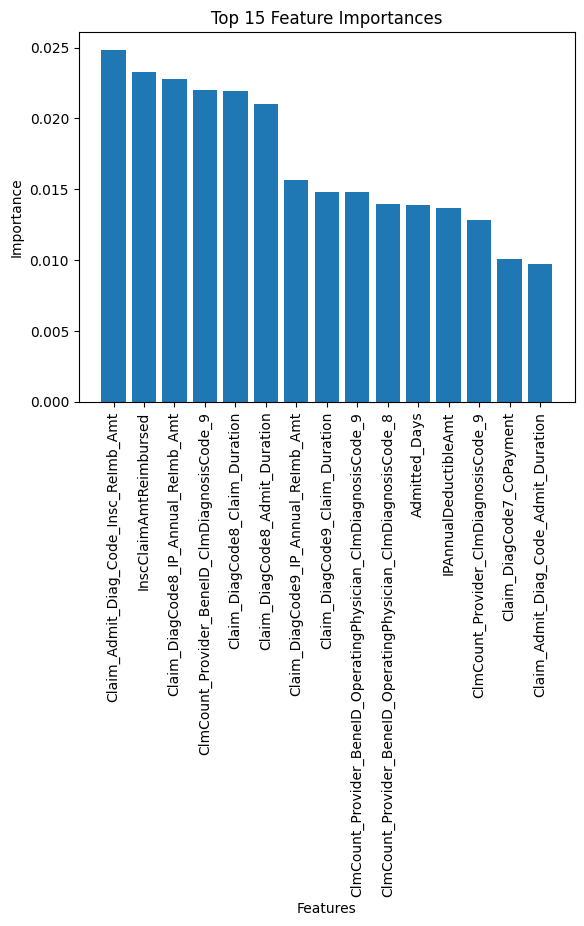

In [8]:

# Get feature importances
feature_importances = rf_model.feature_importances_

# Get the names of the features
feature_names = X.columns  # Assuming you have column names if X is a DataFrame

# Combine feature names and their importances
feature_importance_list = list(zip(feature_names, feature_importances))

# Sort the list by feature importance (descending order)
feature_importance_list.sort(key=lambda x: x[1], reverse=True)


top_n = 15  # Set the desired number of top features to plot

# Print or visualize the feature importances
for feature, importance in feature_importance_list[:top_n]:
    print(f"{feature}: {importance}")



plt.bar(range(top_n), [importance for feature, importance in feature_importance_list[:top_n]], align="center")
plt.xticks(range(top_n), [feature for feature, _ in feature_importance_list[:top_n]], rotation='vertical')
# Add x-axis and y-axis titles
plt.xlabel('Features')
plt.ylabel('Importance')

plt.title(f'Top {top_n} Feature Importances')



<p><div style="text-align: justify;"><span style="font-family: 'Arial'; font-size: 12pt;">
The accuracy and f score of Logistic Regression is greater than all other model. Hence we can conclude that the best performing model among these models is Logistic Regression with an accuracy of 0.926 and F1-Score: 0.545. Also, the features 
InscClaimAmtReimbursed, ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_4, ChronicCond_Heartfailure, ClmCount_Provider_BeneID_ClmDiagnosisCode_2, ChronicCond_Alzheimer, ClmCount_Provider_BeneID_ClmProcedureCode_1, ClmCount_Provider_DiagnosisGroupCode are the first seven features with highest feature importance value greater than 1. Hence, we can confirm that these features contribute our logistic regression model to perform best out of other two models.</span></p>